# HOMEWORK 2
## Oğuzhan Akbaş - 2018402123


In [1]:
require(data.table)
require(zoo)
require(lubridate)


Loading required package: data.table
Warning message:
"package 'data.table' was built under R version 3.6.3"Loading required package: zoo

Attaching package: 'zoo'

The following objects are masked from 'package:base':

    as.Date, as.Date.numeric

Loading required package: lubridate

Attaching package: 'lubridate'

The following objects are masked from 'package:data.table':

    hour, isoweek, mday, minute, month, quarter, second, wday, week,
    yday, year

The following object is masked from 'package:base':

    date



In [2]:
d_path = 'C:/Users/akbas/Desktop/IE360/Homework 02/IE360_Spring22_HW2_data.csv'
ugs = fread(d_path)

head(ugs)
str(ugs)


Quarter,Unleaded Gasoline Sale (UGS),RNUV,# LPG Vehicles (NLPG),Price of Unleaded Gasoline (PU),Price of Diesel Gasoline (PG),# Unleaded Gasoline Vehicles (NUGV),# of Diesel Gasoline Vehicles (NDGV),GNP Agriculture,GNP Commerce,GNP Total
2000_Q1,1 128 971,0.0146,940 000,469.03,355.69,4 647 500,281.9853,1 040 173,3 483 132,18 022 686
2000_Q2,1 199 569,0.0205,941 000,459.42,344.58,4 742 876,284.0813,1 760 460,4 525 451,21 797 130
2000_Q3,1 370 167,0.0207,943 500,439.98,327.21,4 840 931,286.7169,6 974 808,5 915 204,30 050 207
2000_Q4,1 127 548,0.0163,948 000,402.08,300.67,4 919 685,288.3137,3 267 125,4 929 778,24 480 153
2001_Q1,1 033 918,0.0071,950 000,411.58,305.75,4 954 754,287.6237,1 004 528,3 418 387,15 832 648
2001_Q2,1 019 754,0.0051,955 000,520.39,374.78,4 980 204,287.8814,1 449 357,4 359 831,20 296 918


Classes 'data.table' and 'data.frame':	32 obs. of  11 variables:
 $ Quarter                             : chr  "2000_Q1" "2000_Q2" "2000_Q3" "2000_Q4" ...
 $ Unleaded Gasoline Sale (UGS)        : chr  "1 128 971" "1 199 569" "1 370 167" "1 127 548" ...
 $ RNUV                                : num  0.0146 0.0205 0.0207 0.0163 0.0071 0.0051 0.0041 0.0048 0.0012 0.0032 ...
 $ # LPG Vehicles (NLPG)               : chr  "940 000" "941 000" "943 500" "948 000" ...
 $ Price of Unleaded Gasoline (PU)     : num  469 459 440 402 412 ...
 $ Price of Diesel Gasoline (PG)       : num  356 345 327 301 306 ...
 $ # Unleaded Gasoline Vehicles (NUGV) : chr  "4 647 500" "4 742 876" "4 840 931" "4 919 685" ...
 $ # of Diesel Gasoline Vehicles (NDGV): num  282 284 287 288 288 ...
 $ GNP Agriculture                     : chr  "1 040 173" "1 760 460" "6 974 808" "3 267 125" ...
 $ GNP Commerce                        : chr  "3 483 132" "4 525 451" "5 915 204" "4 929 778" ...
 $ GNP Total                     

### DATA PREPARATION

In [3]:
ugs$Quarter= as.Date(as.yearqtr(ugs$Quarter, format = "%Y_Q%q"))

colnames(ugs)[2]="UGS"
ugs$UGS= gsub(" ", "", ugs$UGS, fixed = TRUE)
ugs$UGS= as.numeric(ugs$UGS)


ugs$`# LPG Vehicles (NLPG)` = gsub(" ", "", ugs$`# LPG Vehicles (NLPG)` , fixed = TRUE)
ugs$`# LPG Vehicles (NLPG)` = as.numeric(ugs$`# LPG Vehicles (NLPG)`)
colnames(ugs)[4]="NLPG"

colnames(ugs)[5]="PU"
colnames(ugs)[6]="PG"
colnames(ugs)[8]="NDGV"

ugs$`# Unleaded Gasoline Vehicles (NUGV)` = gsub(" ", "", ugs$`# Unleaded Gasoline Vehicles (NUGV)`, fixed=TRUE)
ugs$`# Unleaded Gasoline Vehicles (NUGV)` = as.numeric(ugs$`# Unleaded Gasoline Vehicles (NUGV)`)
colnames(ugs)[7]="NUGV"  

ugs$`GNP Agriculture` = gsub(" ","", ugs$`GNP Agriculture`, fixed = TRUE )
ugs$`GNP Agriculture` = as.numeric(ugs$`GNP Agriculture`)

ugs$`GNP Commerce` = gsub(" ","", ugs$`GNP Commerce`, fixed = TRUE )
ugs$`GNP Commerce` = as.numeric(ugs$`GNP Commerce`)
  
ugs$`GNP Total` = gsub(" ","", ugs$`GNP Total`, fixed = TRUE )
ugs$`GNP Total` = as.numeric(ugs$`GNP Total`)



### --------------------------------------------------------------------------------------------------------------------------

### We can see from the plot that it both has trend and seasonality, therefore it cannot be stationary. Since its mean is decreasing constantly due to the trend and the seasonality implies high auto-covariance.

Loading required package: ggplot2
Warning message:
"Removed 4 row(s) containing missing values (geom_path)."

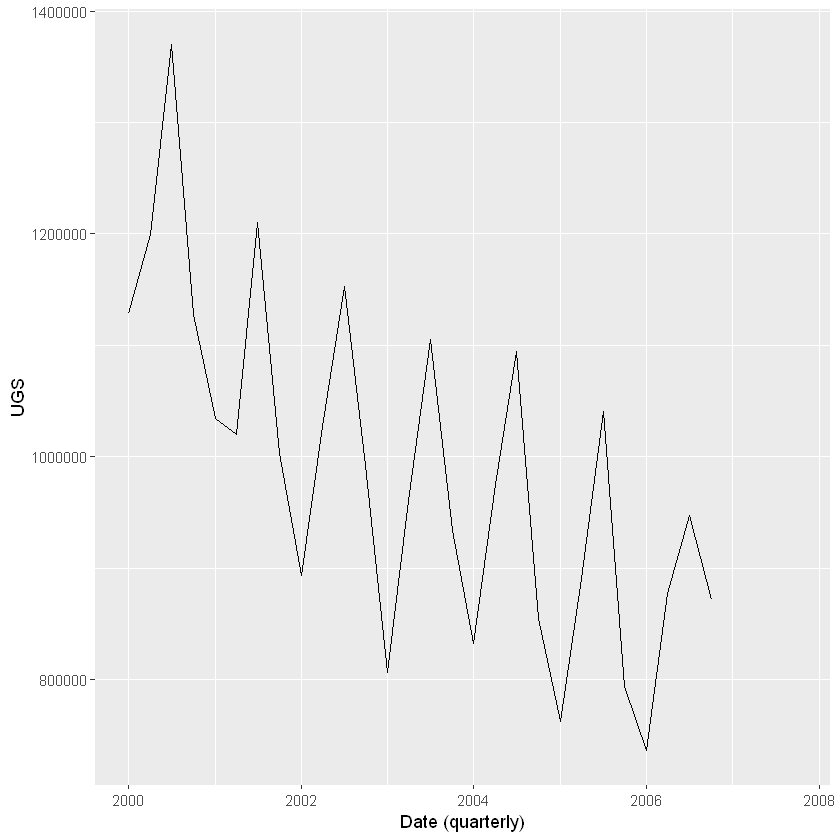

In [4]:
require(ggplot2)
ggplot(data = ugs, aes(x=Quarter, y=UGS)) + xlab("Date (quarterly)")+ ylab("UGS") + geom_line()

## adding the trend to the data

In [5]:
ugs[, trnd:=1:.N]


## adding the quarters to the data and naming them

In [6]:
ugs[, quart:= as.character(month(Quarter, label = T))]
ugs$quart[ugs$quart=="Jan"] = "Q1"
ugs$quart[ugs$quart=="Apr"] = "Q2"
ugs$quart[ugs$quart=="Jul"] = "Q3"
ugs$quart[ugs$quart=="Oct"] = "Q4"
ugs$quart = as.factor(ugs$quart)


## ----------------------------------------------

### Model with trend as the only regressor.

Loading required package: forecast
Warning message:
"package 'forecast' was built under R version 3.6.3"Registered S3 method overwritten by 'xts':
  method     from
  as.zoo.xts zoo 
Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 



Call:
lm(formula = UGS ~ trnd, data = ugs)

Residuals:
    Min      1Q  Median      3Q     Max 
-199945  -73550  -21904   71224  237369 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  1170777      43293  27.043  < 2e-16 ***
trnd          -12660       2608  -4.854 4.95e-05 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 111500 on 26 degrees of freedom
  (4 observations deleted due to missingness)
Multiple R-squared:  0.4754,	Adjusted R-squared:  0.4552 
F-statistic: 23.56 on 1 and 26 DF,  p-value: 4.945e-05



	Breusch-Godfrey test for serial correlation of order up to 6

data:  Residuals
LM test = 19.942, df = 6, p-value = 0.002836


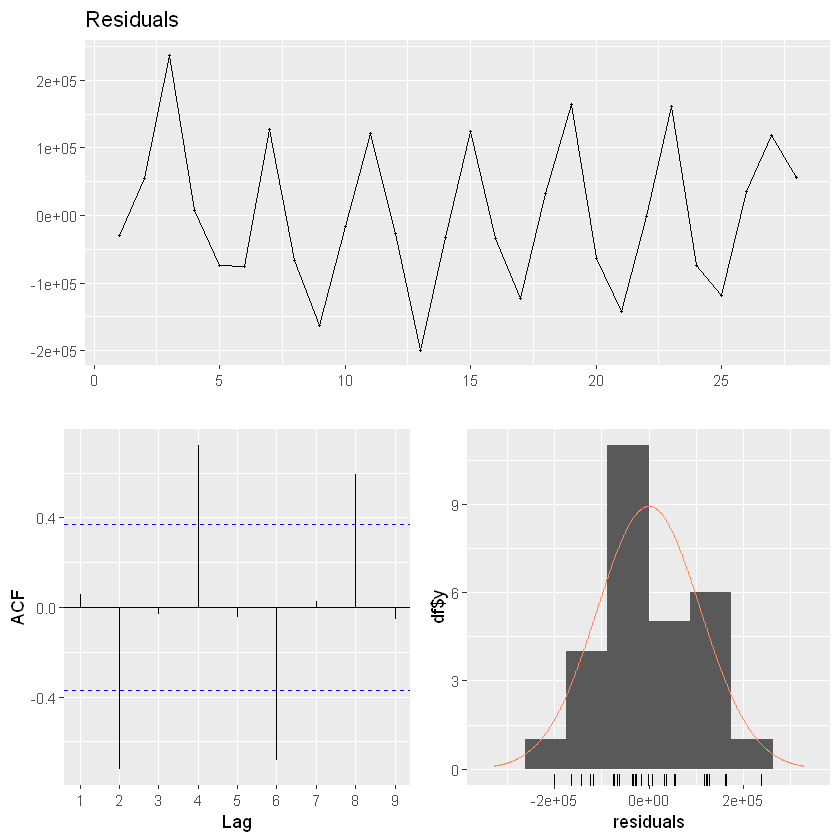

In [7]:
require(forecast)

model_trnd = lm(UGS~trnd, data = ugs)
summary(model_trnd)
checkresiduals(model_trnd)

### We see that the constant decrease in the mean no longer exists, however, there is still seasonality. So, we add seasonality for that purpose.


Call:
lm(formula = UGS ~ trnd + quart, data = ugs)

Residuals:
   Min     1Q Median     3Q    Max 
-81167 -31283  -3458  28640  94502 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  1060372      23653  44.830  < 2e-16 ***
trnd          -13497       1147 -11.764 3.28e-11 ***
quartQ2       121532      25987   4.677 0.000104 ***
quartQ3       273619      26063  10.498 3.03e-10 ***
quartQ4        95049      26189   3.629 0.001405 ** 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 48570 on 23 degrees of freedom
  (4 observations deleted due to missingness)
Multiple R-squared:  0.9119,	Adjusted R-squared:  0.8966 
F-statistic: 59.53 on 4 and 23 DF,  p-value: 8.446e-12



	Breusch-Godfrey test for serial correlation of order up to 8

data:  Residuals
LM test = 11.462, df = 8, p-value = 0.1769


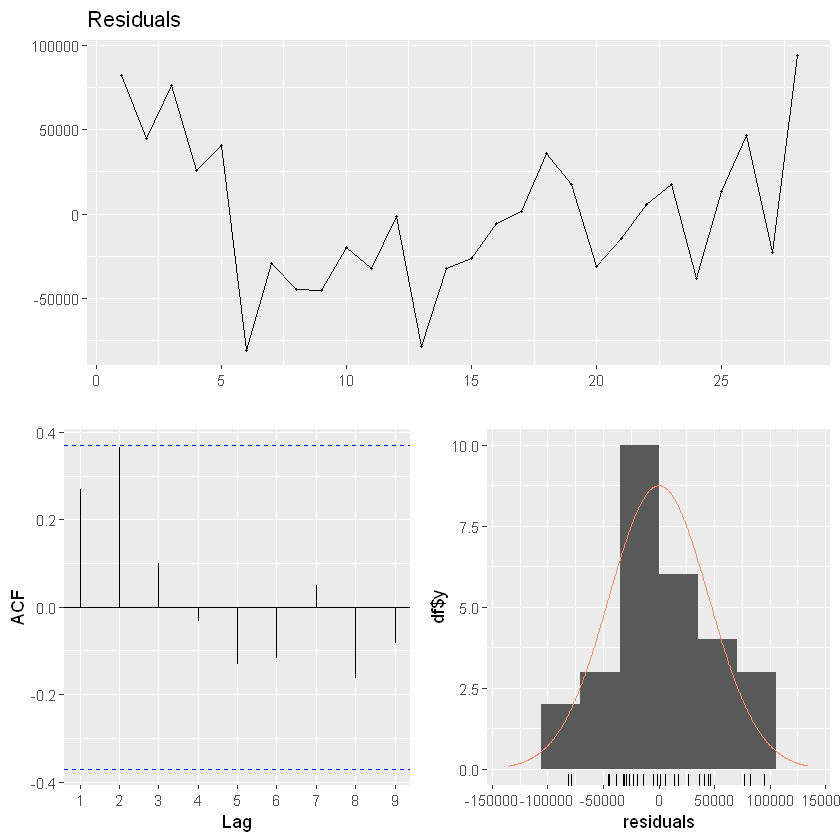

In [8]:
model_trnd_seas= lm(UGS~trnd+quart, data = ugs)
summary(model_trnd_seas)
checkresiduals(model_trnd_seas)

### We see nearly randomly scattered residuals and a very promising adjusted R squared value, yet it still could be improved with relevant predictors and lagged variables. To beable to detect which independent variables we should use in the model as regressors, we check the pairwise correlations between the target and the others. 


Loading required package: GGally
Registered S3 method overwritten by 'GGally':
  method from   
  +.gg   ggplot2
Warning message in ggally_statistic(data = data, mapping = mapping, na.rm = na.rm, :
"Removed 4 rows containing missing values"Warning message:
"Removed 4 rows containing missing values (geom_point)."Warning message:
"Removed 4 rows containing non-finite values (stat_density)."Warning message in ggally_statistic(data = data, mapping = mapping, na.rm = na.rm, :
"Removed 4 rows containing missing values"Warning message in ggally_statistic(data = data, mapping = mapping, na.rm = na.rm, :
"Removed 4 rows containing missing values"Warning message in ggally_statistic(data = data, mapping = mapping, na.rm = na.rm, :
"Removed 4 rows containing missing values"Warning message in ggally_statistic(data = data, mapping = mapping, na.rm = na.rm, :
"Removed 4 rows containing missing values"Warning message in ggally_statistic(data = data, mapping = mapping, na.rm = na.rm, :
"Removed 4 rows 

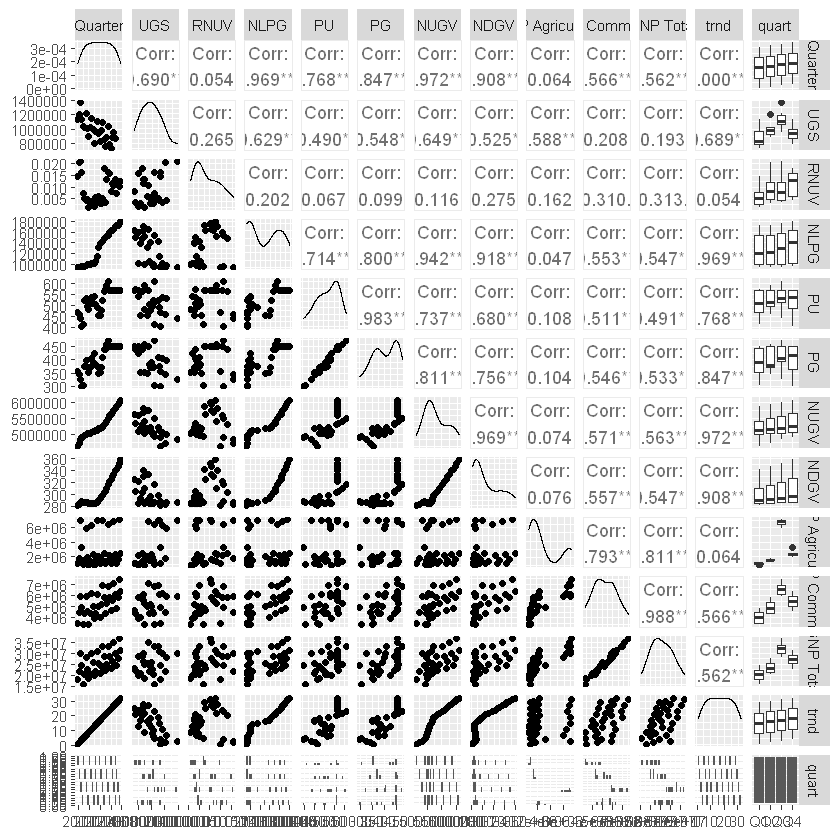

In [9]:
require(GGally)
ggpairs(ugs)


### We see that the independent variables which show high correlation with the target(UGS) are: NLPG, PU, PG, NUGV, NDGV, GNP Agriculture. These are the regressors we will prioritize in our models


Call:
lm(formula = UGS ~ trnd + quart + NLPG + PU + PG + NUGV + NDGV + 
    `GNP Agriculture`, data = ugs)

Residuals:
   Min     1Q Median     3Q    Max 
-67794 -10461   1987  18461  32208 

Coefficients:
                    Estimate Std. Error t value Pr(>|t|)    
(Intercept)        3.094e+06  8.283e+05   3.735  0.00165 ** 
trnd               1.514e+04  1.284e+04   1.178  0.25486    
quartQ2            1.463e+05  2.356e+04   6.212 9.48e-06 ***
quartQ3            4.953e+05  1.597e+05   3.102  0.00648 ** 
quartQ4            1.607e+05  4.385e+04   3.664  0.00192 ** 
NLPG              -2.937e-01  1.804e-01  -1.628  0.12195    
PU                 2.276e+01  1.017e+03   0.022  0.98241    
PG                -1.129e+03  1.437e+03  -0.786  0.44295    
NUGV              -1.023e+00  3.343e-01  -3.061  0.00708 ** 
NDGV               1.238e+04  3.581e+03   3.456  0.00302 ** 
`GNP Agriculture` -3.613e-02  2.764e-02  -1.307  0.20854    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 


	Breusch-Godfrey test for serial correlation of order up to 14

data:  Residuals
LM test = 26.623, df = 14, p-value = 0.02154


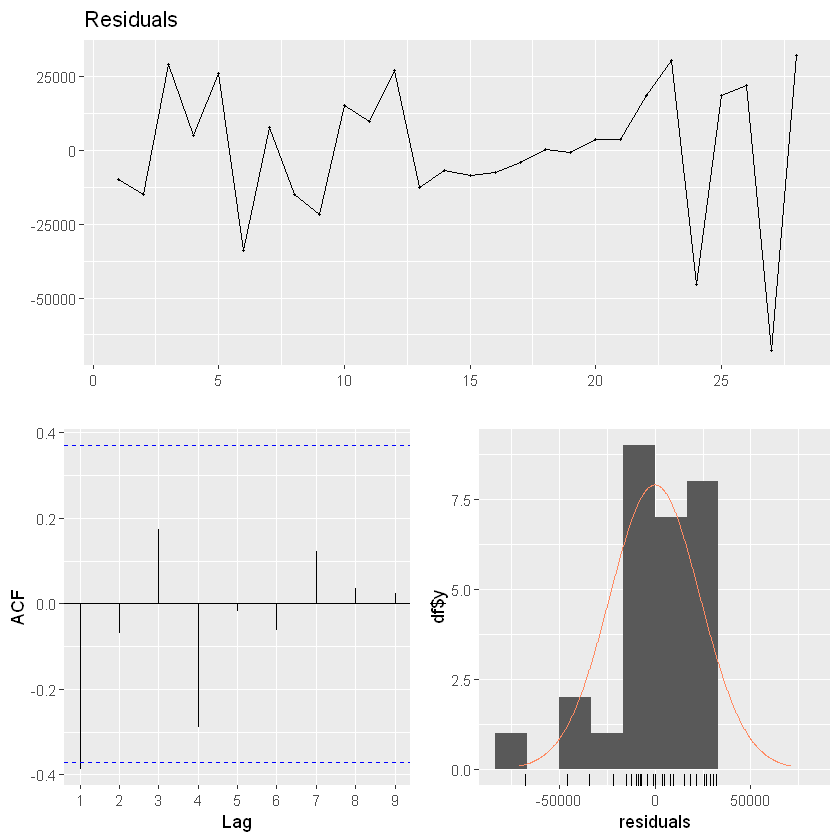

In [10]:
model_all = lm(UGS~trnd+quart+NLPG+PU+PG+NUGV+NDGV+`GNP Agriculture`, data = ugs)
summary(model_all)
checkresiduals(model_all)

### From the adjusted R-sq value, we conclude that this is a rather good model. However, due to strong correlations between some variables(e.g.PU-PG,), some of the regressors turned out to be insignificant. So, we drop one of them ->PG



Call:
lm(formula = UGS ~ trnd + quart + NLPG + PU + NUGV + NDGV + `GNP Agriculture`, 
    data = ugs)

Residuals:
   Min     1Q Median     3Q    Max 
-66562  -8231   -274  16957  39535 

Coefficients:
                    Estimate Std. Error t value Pr(>|t|)    
(Intercept)        2.677e+06  6.293e+05   4.254 0.000477 ***
trnd               7.740e+03  8.644e+03   0.895 0.382353    
quartQ2            1.496e+05  2.295e+04   6.516 3.99e-06 ***
quartQ3            4.720e+05  1.552e+05   3.041 0.007030 ** 
quartQ4            1.518e+05  4.190e+04   3.622 0.001949 ** 
NLPG              -2.071e-01  1.413e-01  -1.466 0.159965    
PU                -7.562e+02  2.246e+02  -3.367 0.003432 ** 
NUGV              -8.425e-01  2.400e-01  -3.511 0.002496 ** 
NDGV               1.046e+04  2.590e+03   4.037 0.000773 ***
`GNP Agriculture` -3.187e-02  2.681e-02  -1.189 0.250013    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 29380 on 18 degrees of freedom
  (


	Breusch-Godfrey test for serial correlation of order up to 13

data:  Residuals
LM test = 26.578, df = 13, p-value = 0.0142


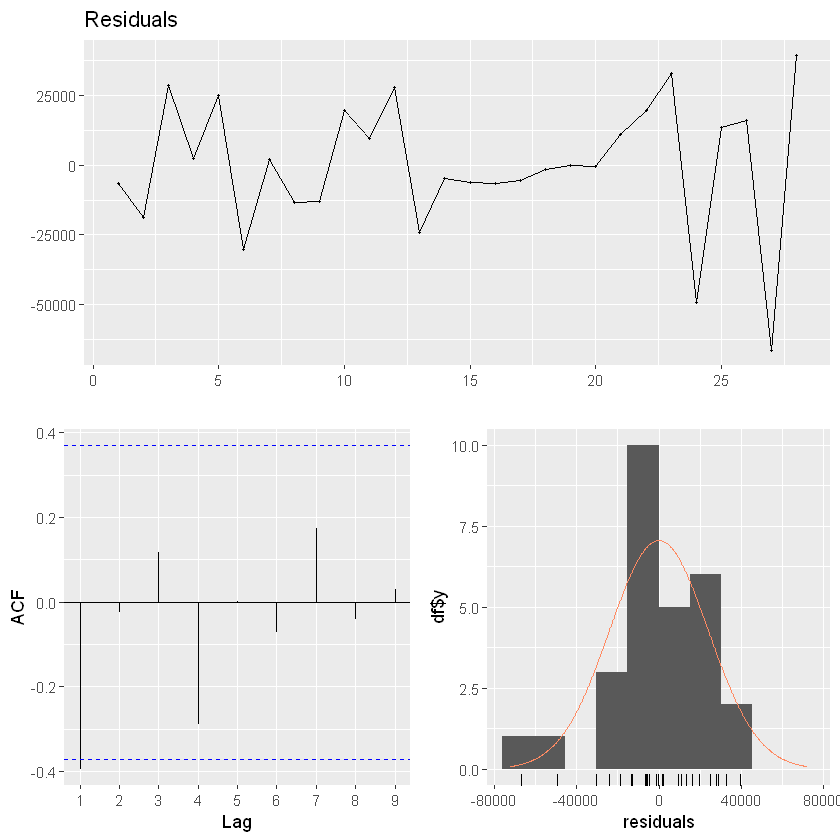

In [13]:
model_all = lm(UGS~trnd+quart+NLPG+PU+NUGV+NDGV+`GNP Agriculture`, data = ugs)
summary(model_all)
checkresiduals(model_all)

### Now we check the autocorrelation of the residuals in order to understand if it can be explained & forecasted in a better way with some lagged variables.

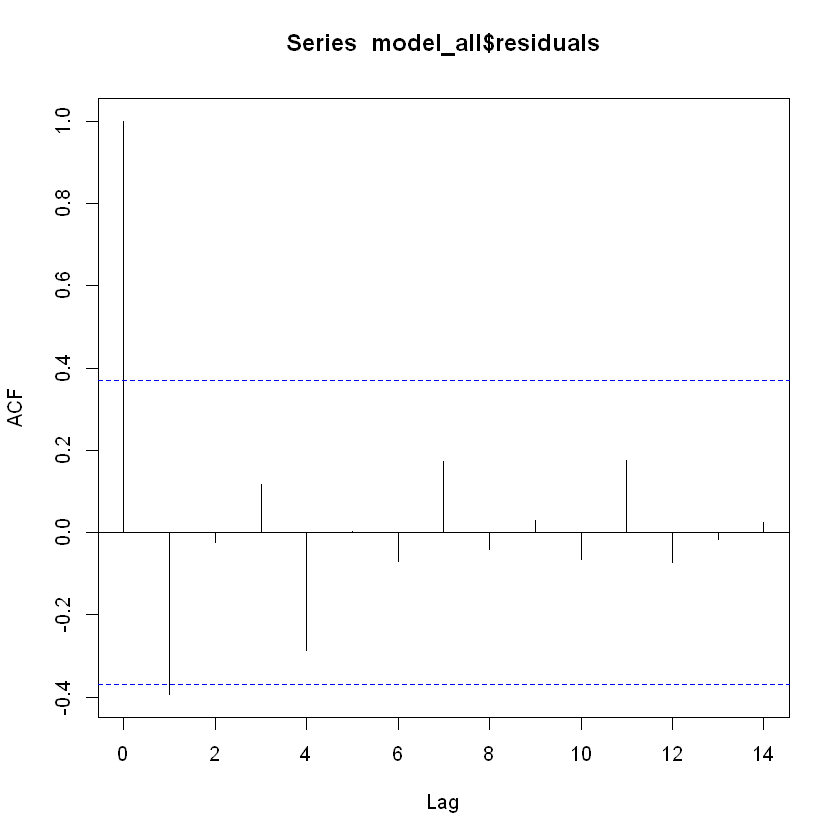

In [14]:
acf(model_all$residuals)
 

### And we see that only the autocorr. at lag 1 is above the tolerance limit. Thus, we add a lagged variable at lag 1 to our model and observe the changes.

In [15]:
lagged_UGS1 = shift(ugs$UGS, n= 1, fill = NA, type = "lag")

head(ugs$UGS)
head(lagged_UGS1)

#adding two lagged variables to the data
ugs = ugs[, UGS_lag1:=lagged_UGS1]


[1] 1128971 1199569 1370167 1127548 1033918 1019754

[1]      NA 1128971 1199569 1370167 1127548 1033918

In [16]:
library(dplyr)
require(forecast)


Warning message:
"package 'dplyr' was built under R version 3.6.3"
Attaching package: 'dplyr'

The following objects are masked from 'package:lubridate':

    intersect, setdiff, union

The following objects are masked from 'package:data.table':

    between, first, last

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union



### We create a model with lagged variable with lag 1 added to our best model yet.



Call:
lm(formula = UGS ~ trnd + quart + NLPG + PU + NUGV + NDGV + `GNP Agriculture` + 
    UGS_lag1, data = ugs)

Residuals:
   Min     1Q Median     3Q    Max 
-48600 -13537   -940  15472  37692 

Coefficients:
                    Estimate Std. Error t value Pr(>|t|)    
(Intercept)        3.510e+06  8.360e+05   4.198 0.000681 ***
trnd               2.539e+03  1.063e+04   0.239 0.814214    
quartQ2            8.691e+04  3.571e+04   2.434 0.027029 *  
quartQ3            3.239e+05  1.712e+05   1.892 0.076711 .  
quartQ4            2.055e+05  4.653e+04   4.417 0.000432 ***
NLPG              -1.882e-01  1.502e-01  -1.253 0.228228    
PU                -7.097e+02  2.118e+02  -3.350 0.004064 ** 
NUGV              -1.066e+00  3.264e-01  -3.265 0.004861 ** 
NDGV               1.315e+04  3.454e+03   3.808 0.001545 ** 
`GNP Agriculture` -3.002e-03  3.071e-02  -0.098 0.923328    
UGS_lag1          -4.903e-01  2.261e-01  -2.169 0.045498 *  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.


	Breusch-Godfrey test for serial correlation of order up to 14

data:  Residuals
LM test = 26.379, df = 14, p-value = 0.02316


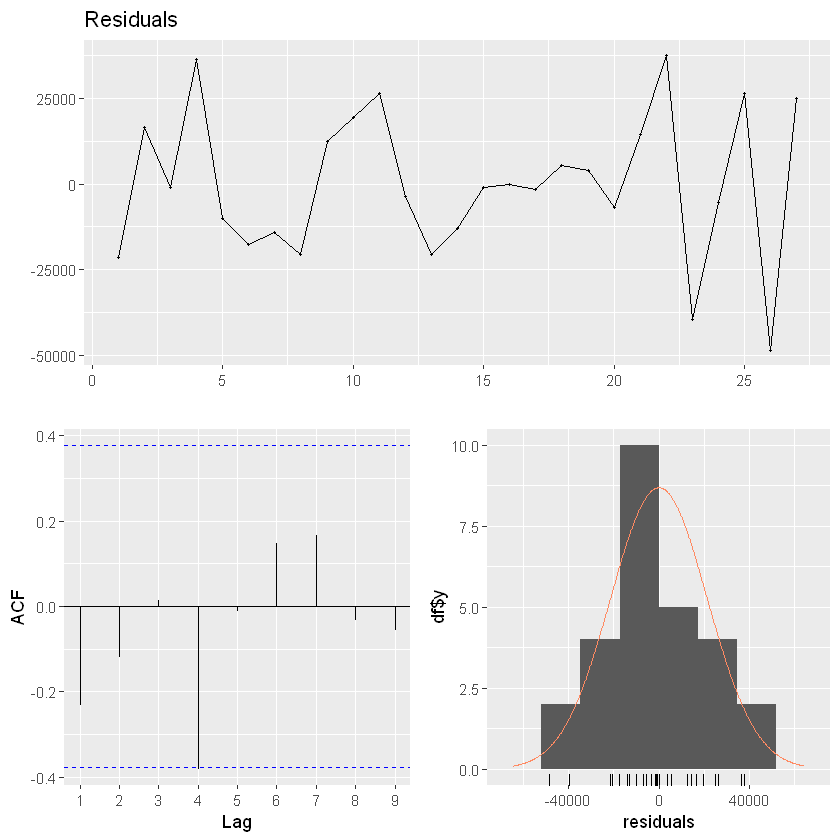

In [17]:
model_lag1 = lm(UGS~trnd+quart+NLPG+PU+NUGV+NDGV+`GNP Agriculture`+UGS_lag1, ugs)
summary(model_lag1)
checkresiduals(model_lag1)

### Since acf for residuals at lag 4 seems on the edge of the tolerated limit, it might be a good idea to add a lag 4 variable and compare the models.



Call:
lm(formula = UGS ~ trnd + quart + NLPG + PU + NUGV + NDGV + `GNP Agriculture` + 
    UGS_lag1 + UGS_lag4, data = ugs)

Residuals:
   Min     1Q Median     3Q    Max 
-41791 -15347    230  13133  42310 

Coefficients:
                    Estimate Std. Error t value Pr(>|t|)   
(Intercept)        4.636e+06  1.406e+06   3.298  0.00637 **
trnd               1.203e+04  1.687e+04   0.713  0.48960   
quartQ2            1.074e+05  5.249e+04   2.046  0.06327 . 
quartQ3            4.181e+05  2.812e+05   1.487  0.16277   
quartQ4            2.333e+05  6.528e+04   3.574  0.00382 **
NLPG              -3.036e-01  2.056e-01  -1.477  0.16548   
PU                -7.529e+02  2.429e+02  -3.100  0.00919 **
NUGV              -1.585e+00  6.139e-01  -2.582  0.02400 * 
NDGV               1.881e+04  6.612e+03   2.844  0.01478 * 
`GNP Agriculture` -1.599e-02  4.874e-02  -0.328  0.74854   
UGS_lag1          -4.751e-01  2.562e-01  -1.854  0.08847 . 
UGS_lag4          -8.853e-02  2.086e-01  -0.424  0.67877

ERROR: Error in chol2inv(auxfit$qr$qr): 'size' cannot exceed nrow(x) = 24


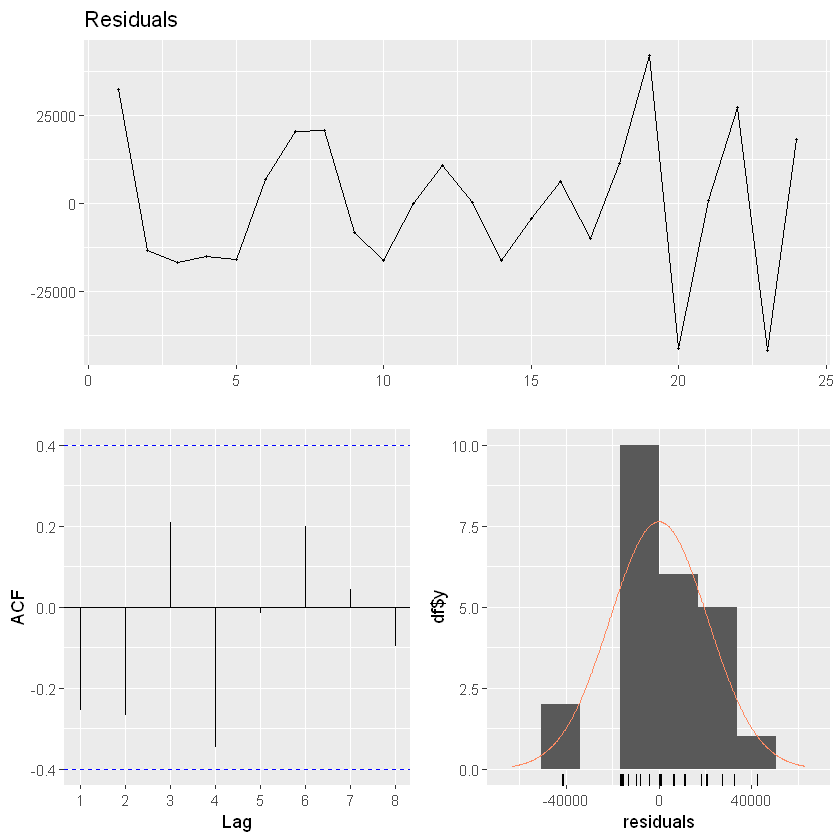

In [19]:
lagged_UGS4 = shift(ugs$UGS, n= 4, fill = NA, type = "lag")
ugs = ugs[, UGS_lag4:=lagged_UGS4]

model_lags = lm(UGS~trnd+quart+NLPG+PU+NUGV+NDGV+`GNP Agriculture`+UGS_lag1+ UGS_lag4, ugs)
summary(model_lags)
checkresiduals(model_lags)

#### As it can be seen from the adjusted R squared values and the disrupted normality of the residuals in the second model, adding only the variable with 1 lag improves and gives the best model. Therefore, we add only our lagged variable(lag=1) to our best model with other relevant independent regressors. -> which is the "model_lag1"

### Even though we have resulted in a very good model with adjusted R-sq = 0.9675, we still have some insignificant regressors in the summary table which are "NLPG and GNP Agriculture". So, we drop them and  compare the new model with the old model.


Call:
lm(formula = UGS ~ trnd + quart + PU + NUGV + NDGV + UGS_lag1, 
    data = ugs)

Residuals:
   Min     1Q Median     3Q    Max 
-44528 -10996  -4285  15377  39939 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  2.796e+06  6.050e+05   4.621 0.000212 ***
trnd        -8.559e+03  3.562e+03  -2.403 0.027253 *  
quartQ2      9.041e+04  2.366e+04   3.821 0.001252 ** 
quartQ3      3.099e+05  1.729e+04  17.924 6.33e-13 ***
quartQ4      1.985e+05  4.069e+04   4.878 0.000121 ***
PU          -6.308e+02  1.628e+02  -3.876 0.001108 ** 
NUGV        -7.551e-01  2.011e-01  -3.755 0.001450 ** 
NDGV         9.724e+03  2.033e+03   4.782 0.000149 ***
UGS_lag1    -4.865e-01  1.947e-01  -2.499 0.022362 *  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 27090 on 18 degrees of freedom
  (5 observations deleted due to missingness)
Multiple R-squared:  0.9778,	Adjusted R-squared:  0.9679 
F-statistic: 99.11 on 8 and 18 DF,  


	Breusch-Godfrey test for serial correlation of order up to 12

data:  Residuals
LM test = 20.476, df = 12, p-value = 0.05859


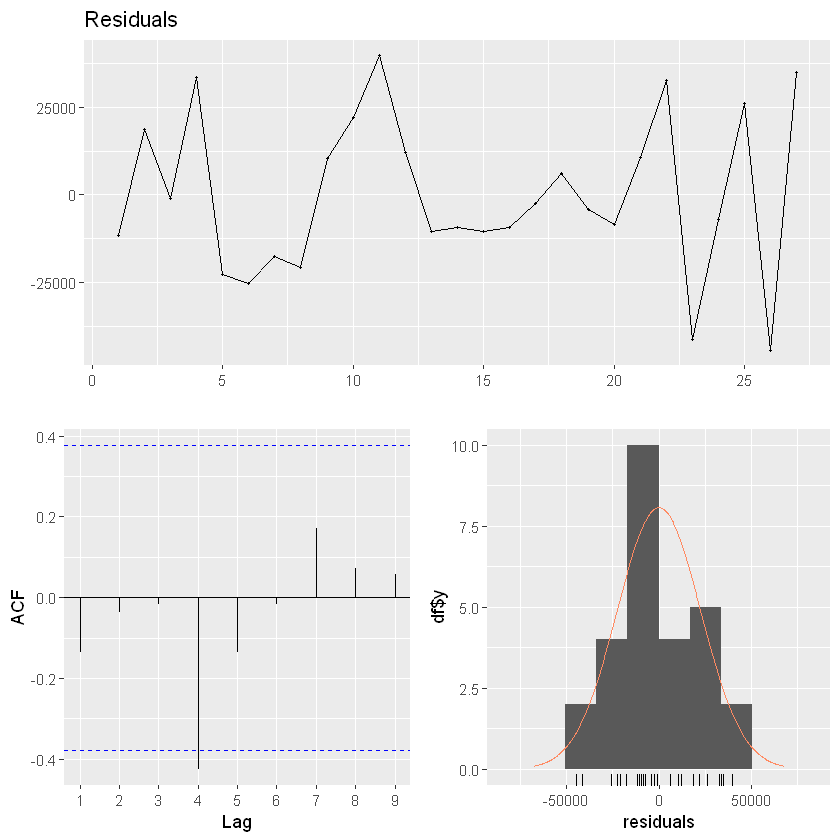

In [20]:
model_lag1_new = lm(UGS~trnd+quart+PU+NUGV+NDGV+UGS_lag1, ugs)
summary(model_lag1_new)
checkresiduals(model_lag1_new)

### Because the adj R squared increased and we now use fewer variables, we prefer the new model.

### Furthermore, the p-value is very small meaning that tha null hypothesis claiming all coefficients are zero is rejected, so our model makes sense. Then we check whether each individual variable is significant or not, and we see that all the t-values are far enough from zero, so they are all significant.
### In the residual analysis, we see that the residuals are distributed rather normally - complying with the normality assumption- and they seem randomly scattered in a rather small range of (-25000,+25000). Therefore, we can conclude that our model is successful.

# -----------------------------------------------------------------------------------------------------------

# NOTE!!!
## Because we have an input variable with lag 1, we are allowed to make one prediction at each step and after we make the prediction, we need to refresh the corresponding lagged value to continue forecasting.
### In other words, since we use a lagged variable in our model, it cannot predict 2 steps ahead. Thus, we rewrite our prediction to the data to forecast further.


In [21]:
dat = copy(ugs)
dat = dat[, actual:= UGS]
dat = dat[, pred_lag1:= predict(model_lag1_new, ugs)]
dat$pred_lag1[29]

for (i in 30:32) {
  
  ugs$UGS_lag1[i] = dat$pred_lag1[i-1]
  dat = dat[, pred_lag1:= predict(model_lag1_new, ugs)]
  print(dat$pred_lag1[i])
}

tail(dat,4)
#Here, the predictions for the 4 quarters of 2007 are shown respectively.

[1] 662492.3

[1] 845565.1
[1] 965974.6
[1] 788131.3


Quarter,UGS,RNUV,NLPG,PU,PG,NUGV,NDGV,GNP Agriculture,GNP Commerce,GNP Total,trnd,quart,UGS_lag1,UGS_lag4,actual,pred_lag1
2007-01-01,NA,0.0074,1715000,565.19,449.19,5869018,342.1729,1132973,4857305,24413807,29,Q1,872000,736580,NA,662492.3
2007-04-01,NA,0.0106,1725300,565.19,449.19,5931348,346.9407,1570703,5852404,27597857,30,Q2,NA,877614,NA,845565.1
2007-07-01,NA,0.0101,1751050,565.19,449.19,5991280,351.4449,7140722,7480414,36741745,31,Q3,NA,946783,NA,965974.6
2007-10-01,NA,0.0124,1797400,565.19,449.19,6065597,357.2902,2418541,6397745,31361112,32,Q4,NA,872000,NA,788131.3


### Here, the predictions for the 4 quarters of 2007 are shown respectively in the last column.
